Import libraries and set device

In [ ]:
import torch
from PIL import Image
from torch import nn, save, load
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

Using device: cuda


Load MNIST dataset

In [ ]:
transform = transforms.ToTensor()
train_data = datasets.MNIST(root="data", download=True, train=True, transform=transform)
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 493kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.59MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.36MB/s]


In [ ]:
#Check total number of images
print("Total samples:", len(train_data))

# Load one sample from the dataset
img, label = train_data[49]

print("Image shape:", img.shape)
print("Label:", label)

#Check total number of images
for images, labels in train_loader:
    print("Batch image shape:", images.shape)
    print("Batch label shape:", labels.shape)
    break

Total samples: 60000
Image shape: torch.Size([1, 28, 28])
Label: 3
Batch image shape: torch.Size([32, 1, 28, 28])
Batch label shape: torch.Size([32])


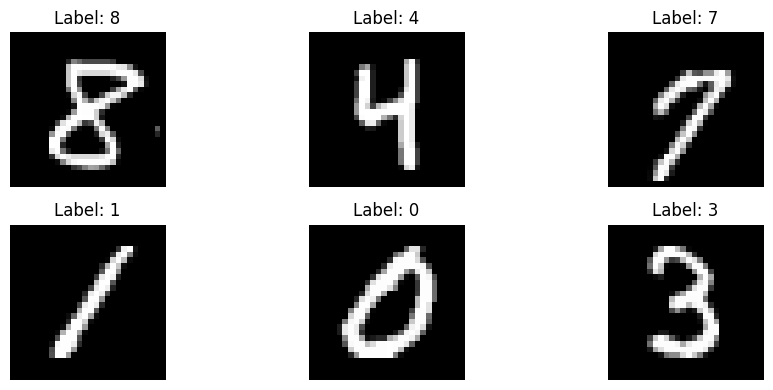

In [ ]:
import matplotlib.pyplot as plt
import random

# Sample 6 random indices
random_indices = random.sample(range(len(train_data)), 6)

# Plot the sampled images
plt.figure(figsize=(10, 4))
for i, idx in enumerate(random_indices):
    image, label = train_data[idx]
    plt.subplot(2, 3, i + 1)
    plt.imshow(image.squeeze(), cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

Define the Neural Network

In [ ]:
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, (3,3)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),
            nn.Flatten(),
            nn.Linear(64 * 20 * 20, 10)
        )

    def forward(self, x):
        return self.model(x)

Prepare training components

In [ ]:
clf = ImageClassifier().to(device)
optimizer = Adam(clf.parameters(), lr=1e-3)
loss_fn = nn.CrossEntropyLoss()

Train the model

In [ ]:
for epoch in range(10):
    total_loss = 0
    correct = 0
    total = 0

    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        ypred = clf(X)
        loss = loss_fn(ypred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #Loss calculation
        avg_loss = total_loss / len(train_loader)
        total_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(ypred, 1) # Take index of highest logit
        correct += (predicted == y).sum().item()
        total += y.size(0)
        accuracy = 100 * correct / total

    print(f"Epoch {epoch+1} Loss_per_epoch: {loss.item()} | Avg_loss: {avg_loss:.4f} | total_loss: {total_loss:.4f} | Accuracy: {accuracy:.2f}%")

Epoch 1 Loss_per_epoch: 3.4645006508071674e-07 | Avg_loss: 0.0029 | total_loss: 5.3738 | Accuracy: 99.93%
Epoch 2 Loss_per_epoch: 0.0 | Avg_loss: 0.0035 | total_loss: 6.5170 | Accuracy: 99.92%
Epoch 3 Loss_per_epoch: 2.793955218294286e-07 | Avg_loss: 0.0029 | total_loss: 5.3541 | Accuracy: 99.94%
Epoch 4 Loss_per_epoch: 0.0 | Avg_loss: 0.0021 | total_loss: 3.9213 | Accuracy: 99.95%
Epoch 5 Loss_per_epoch: 0.0 | Avg_loss: 0.0024 | total_loss: 4.5796 | Accuracy: 99.94%
Epoch 6 Loss_per_epoch: 0.0 | Avg_loss: 0.0031 | total_loss: 5.8069 | Accuracy: 99.94%
Epoch 7 Loss_per_epoch: 0.0 | Avg_loss: 0.0020 | total_loss: 3.6563 | Accuracy: 99.96%
Epoch 8 Loss_per_epoch: 0.0 | Avg_loss: 0.0049 | total_loss: 9.1819 | Accuracy: 99.91%
Epoch 9 Loss_per_epoch: 0.0 | Avg_loss: 0.0024 | total_loss: 4.4346 | Accuracy: 99.96%
Epoch 10 Loss_per_epoch: 0.0 | Avg_loss: 0.0023 | total_loss: 4.4022 | Accuracy: 99.96%


Save the trained model

In [33]:
from google.colab import drive
import os

drive.mount('/content/drive')

# Create model directory
model_dir = '/content/drive/MyDrive/pytorch_mnist'
os.makedirs(model_dir, exist_ok=True)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [18]:
torch.save(clf.state_dict(), os.path.join(model_dir, 'model_state.pt'))

Load the model

In [19]:
clf_loaded = ImageClassifier().to(device)
clf_loaded.load_state_dict(torch.load('/content/drive/MyDrive/pytorch_mnist/model_state.pt'))
clf_loaded.eval()

ImageClassifier(
  (model): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (3): ReLU()
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1))
    (5): ReLU()
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=30976, out_features=10, bias=True)
  )
)

Upload test image from local PC directory

In [23]:
#Load from local PC directory

from google.colab import files
uploaded = files.upload()

Saving digit_2.jpg to digit_2 (1).jpg


In [26]:
img = Image.open('digit_2.jpg').convert('L').resize((28,28))

img_tensor = transform(img).unsqueeze(0).to(device)

with torch.no_grad():
    output = clf_loaded(img_tensor)
    pred = torch.argmax(output, dim=1)
    print(f"Predicted Digit: {pred.item()}")

Predicted Digit: 2


Upload test image from Google drive

In [47]:
# Path to image in Google Drive
image_path = '/content/drive/MyDrive/pytorch_mnist/digit_9.jpg'

# Open the image
img = Image.open(image_path)

Make Prediction

In [48]:
from torchvision.transforms import ToTensor, Resize, Grayscale

transform = transforms.Compose([
    Grayscale(num_output_channels=1),  # Ensure it's 1 channel
    Resize((28, 28)),                  # Resize to 28x28
    ToTensor()
])

img_tensor = transform(img).unsqueeze(0).to(device)  # Add batch dimension

# Predict
clf_loaded.eval()
with torch.no_grad():
    prediction = torch.argmax(clf_loaded(img_tensor))
    print(f"Predicted class: {prediction.item()}")

Predicted class: 9
